In [1]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance
import matplotlib.pyplot as plt
import time
import scipy.stats as st

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.DataFrame()
df = df.ta.ticker("spy")
df["newDate"] = df.index
df = df[df["newDate"] >= "2000-01-01"]
del df["newDate"]
df

In [ ]:
df.ta.alma(length=3)

In [869]:
df.ta.cores = 4
# Accelerating bands
# monies = []
# for length in range(1,250):
#     currmonies = []
#     for j in range(1,100):
#         mylength=length
#         df2 = df.ta.accbands(length=length,c=j/10)
#         currmoney = df["close"][df.index[mylength-1]]
#         lastclose = currmoney
#         goingUp = True
#         for date in df.index[mylength-1:]:
#             if goingUp:
#                 currmoney *= df["close"][date] / lastclose
#             lastclose = df["close"][date]
#             if df["high"][date] >= df2["ACCBU_{}".format(length)][date]:
#                 goingUp = True
#             else:
#                 goingUp = False
#         currmonies += [currmoney]
#     monies += [currmonies]
    
# maxes = []
# for i in range(len(monies[0])):
#     maxes += [np.argmax([row[i] for row in monies])]

# currmonies = []
# for length in range(1,250):
#     df2 = df.ta.accbands(length=length,c=(maxes[length-1]+1)/10,mamode='ema')
#     money = []
#     for mylength in range(length, len(df.index), 30):
#         currmoney = df["close"][df.index[mylength-1]]
#         lastclose = currmoney
#         goingUp = True
#         for date in df.index[mylength-1:]:
#             if goingUp:
#                 currmoney *= df["close"][date] / lastclose
#             lastclose = df["close"][date]
#             if df["high"][date] >= df2["ACCBU_{}".format(length)][date]:
#                 goingUp = True
#             else:
#                 goingUp = False
#         money += [currmoney]
#     currmonies += [sum(money)/len(money)]

# Accumulation/distribution

# currmonies = []
# for offset in range(200):
#     df2 = df.ta.ad(offset=offset)
#     money = []
#     for mylength in range(offset, len(df.index)//2, 30):
#         currmoney = df["close"][df.index[mylength]]
#         lastclose = currmoney
#         lastad = -np.inf
#         goingUp = True
#         for date in df.index[mylength:]:
#             if goingUp:
#                 currmoney *= df["close"][date] / lastclose
#             lastclose = df["close"][date]
#             if df2[date] >= lastad:
#                 goingUp = True
#             else:
#                 goingUp = False
#             lastad = df2[date]
#         money += [currmoney]
#     currmonies += [money]

# Chaikin Oscillator

# monies = []
# fast = 43
# for offset in range(200):
#     currmonies = [0]*fast
#     for slow in range(fast+1,200):
#         df2 = df.ta.adosc(fast=fast,slow=slow,offset=offset)
#         currmoney = df["close"][df.index[slow-1+offset]]
#         lastclose = currmoney
#         goingUp = True
#         for date in df.index[slow-1+offset:]:
#             if goingUp:
#                 currmoney *= df["close"][date] / lastclose
#             lastclose = df["close"][date]
#             if df2[date] < 0:
#                 goingUp = False
#             else:
#                 goingUp = True
#         currmonies += [currmoney]
#     monies += [currmonies]

# maxes = []
# for i in monies:
#     maxes += [np.argmax(i)]
# max([monies[i][maxes[i]] for i in range(len(maxes))])

# Average Directional Index
# currmonies = []
# length=79
# lensig=13
# scalar=70
# drift=190
# offset=0
# df2 = df.ta.adx(length=length,lensig=lensig,scalar=scalar,drift=drift, offset=offset)
# for mylength in range(length, len(df.index), 20):
#     currmoney = df["close"][df.index[mylength]]
#     lastclose = currmoney
#     goingUp = True
#     for date in df.index[mylength:]:
#         if goingUp:
#             currmoney *= df["close"][date] / lastclose
#         lastclose = df["close"][date]
#         goingUp = not (df2["DMN_{}".format(length)][date] > df2["DMP_{}".format(length)][date] and df2["ADX_{}".format(lensig)][date] >= 25)
#     currmonies += [currmoney]

# Arnaud Legoux Moving Average
currmonies = np.zeros((10,10,10,10))
# length=30
# sigma=5
# do=0.9
# offset=90
for length in range(20,40,2):
    for sigma in range(40,60,2):
        for do in range(80, 100, 2):
            for offset in range(80, 100, 2):
                df2 = df.ta.alma(length=length,sigma=sigma/10,distribution_offset=do/100,offset=offset)
                mylength=length+1
                currmoney = df["close"][df.index[mylength+1]]
                lastalma = df2[df.index[mylength]]
                lastclose = currmoney
                goingUp = True
                for date in df.index[mylength+1:]:
                    if goingUp:
                        currmoney *= df["close"][date] / lastclose
                    lastclose = df["close"][date]
                    goingUp = df2[date] >= lastalma
                    lastalma = df2[date]
                currmonies[length//2 - 10, sigma//2 - 20, do//2 - 40, offset//2 - 40] = currmoney

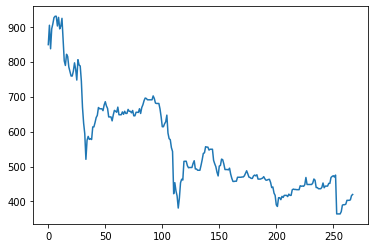

In [858]:
x = [i for i in range(len(monies))]
# y1 = [st.norm.cdf((np.mean(monies[i])-df['close'][df.index[-1]])/np.std(monies[i])) for i in range(len(monies))]
y1 = monies
plt.plot(x,y1)

In [ ]:
maxval = 0
maxidx = (-1,-1,-1)
for i in range(10):
    for j in range(10):
        for k in range(10):
            val = st.norm.cdf((np.mean(currmonies[i,j,k,:])-df['close'][df.index[-1]])/np.std(currmonies[i,j,k,:]))
            if maxval < val:
                maxval = val
                maxidx = (i, j, k)
            print("sig: {}, do: {}, off: {}, {}".format(i+1, j/10, k*10, val))

4446

In [843]:
maxidx

(1, 4, 9)

In [862]:
st.norm.cdf((np.mean(monies) - 420.04)/np.std(monies))

0.8415762011289817

In [673]:
x = [i for i in range(len(monies[-1]))]
y1 = [st.norm.cdf((np.mean([monies[j][i] for j in range(max(0, i-34), len(monies))])-df['close'][df.index[-1]])/np.std([monies[j][i] for j in range(max(0, i-34), len(monies))])) for i in range(len(monies[-1]))]
plt.plot(x,y1)

IndexError: list index out of range

In [629]:
np.argmax([st.norm.cdf((np.mean([monies[j][i] for j in range(max(0, i-34), len(monies))])-df['close'][df.index[-1]])/np.std([monies[j][i] for j in range(max(0, i-34), len(monies))])) for i in range(63)])

40

In [695]:
st.norm.cdf((np.mean(currmonies)-df['close'][df.index[-1]])/(np.std(currmonies)))

0.7976511080085017

In [499]:
a = [st.norm.cdf((np.mean(monies[i])-411.94)/np.std(monies[i])) for i in range(len(monies))]
for i in range(len(a)):
    if a[i] > 0.95:
        print(i, a[i])

<ipython-input-499-e8363c3c31f3>:1: RuntimeWarning: divide by zero encountered in double_scalars
  a = [st.norm.cdf((np.mean(monies[i])-411.94)/np.std(monies[i])) for i in range(len(monies))]


In [773]:
df.ta.indicators()
help(ta.alma)

Pandas TA - Technical Analysis Indicators - v0.2.75b0
Total Indicators: 198
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, kama, kc, kdj, kst, kurtosis, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, uo, variance, vidya, vortex, vp, vwap, vwma, wcp, wil

In [18]:
# High performing indicators

# accumulation/distribution: offset=148 => 411.94 -> 785.19 (5/18/21)
# chaikin oscillator: fast=2, slow=142, offset=35 => 411.94 -> 1169.45 (p-value 0.991 for f=2,o=35) (5/18/21)
# average directional index: length=79, lensig=13 => 420.04 -> 455.59 (p-value 0.7977 for l=79, ls=13) (5/29/21)

In [ ]:
newcurrmonies = []
length=30
sigma=5
do=0.9
offset=90
df2 = df.ta.alma(length=length,sigma=sigma,distribution_offset=do,offset=offset)
mylength = length+1
currmoney = df["Close"][df.index[mylength+1]]
lastalma = df2[df.index[mylength]]
lastclose = currmoney
goingUp = True
for date in df.index[mylength+1:]:
    if goingUp:
        currmoney *= df["Close"][date] / lastclose
        print(date, currmoney)
    newcurrmonies += [currmoney]
    lastclose = df["Close"][date]
    goingUp = df2[date] >= lastalma
    lastalma = df2[date]

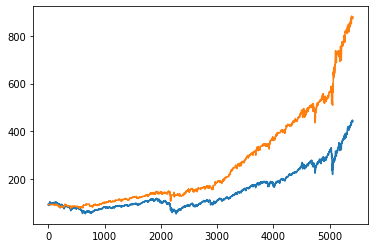

In [8]:
x = [i for i in range(len(newcurrmonies))]
y1 = list(df["Close"])[mylength+1:]
y2 = newcurrmonies
plt.plot(x,y1)
plt.plot(x,y2)

In [ ]:
offset_ad = 148
fast_co = 2
slow_co = 142
offset_co = 35
df2 = df.ta.ad(offset=offset_ad)
df3 = df.ta.adosc(fast=fast_co,slow=slow_co,offset=offset_co)
mylength = max(offset_ad, slow-1+offset_co)
currmoney = df["close"][df.index[mylength]]
lastclose = currmoney
lastad = -np.inf
goingUp_ad = True
goingUp_co = True
newcurrmonies = []
for date in df.index[mylength:]:
    if goingUp_ad and goingUp_co:
        currmoney *= df["close"][date] / lastclose
        print(date, currmoney)
    lastclose = df["close"][date]
    newcurrmonies += [currmoney]
    goingUp_ad = (df2[date] >= lastad)
    lastad = df2[date]
    goingUp_co = (df3[date] >= 0)

In [758]:
accurate/count

array([0.45408163, 0.53121636, 0.52359551, 0.55794504])

In [759]:
count

array([ 392., 1858.,  445., 2511.])

In [761]:
nucount = 0
up = 0
for date in df.index[mylength:]:
    nucount += 1
    if df['open'][date] <= df['close'][date]:
        up += 1

In [762]:
up/nucount

0.5376199616122841